<a href="https://colab.research.google.com/github/ZichenLiu123/DataScience_Learning/blob/main/Assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q1: Vector Shapes

In [ ]:
!pip install mapclassify #helper package
#import required packages
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString, MultiLineString
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Q1a

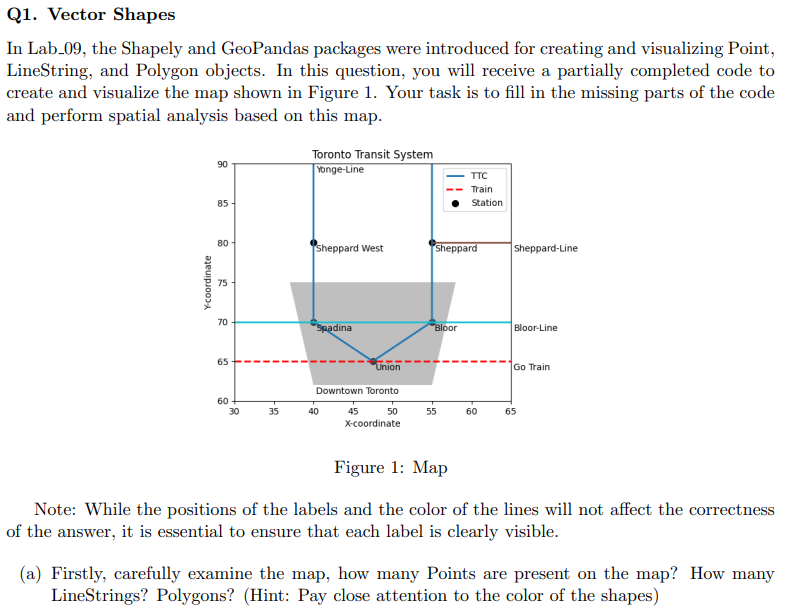

**Your Text Answer** There are 5 Points, 4 LineStrings, and 1 Polygon.

### Q1b

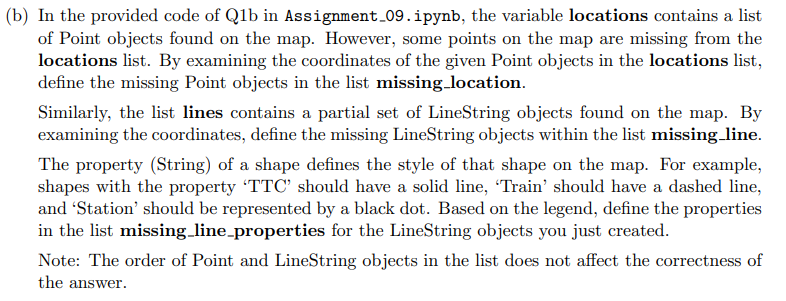

In [ ]:
## DO NOT MODIFY THE CODE BELOW ##
# list of Points objects in the map
locations = [Point(40,80), Point(55,80), Point(55,70),Point(47.5,65)]

# list of LineString objects in the map
lines = [LineString([Point(55,90), Point(55, 70), Point(47.5,65), Point(40, 70), Point(40,90)]),
        LineString([Point(55,80),Point(65,80)]),
        LineString([Point(30,70), Point(65,70)])]

## END OF DO NOT MODIFY ##

# The Point object in map that is missing in the above list
missing_location = [Point(40,70)] ## YOU CODE GOES HERE ##

# The LineString object in map that is missing in the above list
missing_line = [LineString([Point(30,65), Point(65,65)])] ## YOU CODE GOES HERE ##

# The properties of the LineString
missing_line_properties = 'Train'

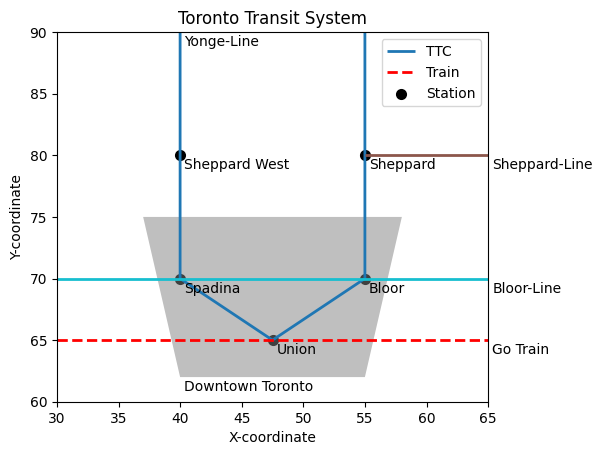

In [ ]:
# run the following code to plot the map
## DO NOT MODIFY THE FOLLOWING CODE ##
locations = [Point(40,80)] + missing_location + [Point(55,80), Point(55,70),Point(47.5,65)]
lines = [lines[0]] + missing_line + [lines[1], lines[2]]
locations_name = ['Sheppard West', 'Spadina', 'Sheppard','Bloor', 'Union']
# List of location properties
location_properties = ['Station' for i in range(len(locations))]
# List of line names
lines_name = ['Yonge-Line', 'Go Train', 'Sheppard-Line', 'Bloor-Line']
# List of line properties
line_properties = ['TTC', missing_line_properties, 'TTC', 'TTC']
# Ploygon
polygon = [Polygon([Point(40,62), Point(55, 62), Point(58,75),Point(37, 75)])]
polygon_name = ['Downtown Toronto']
polygon_properties = ['Area']
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'name': lines_name  + locations_name + polygon_name,
                       'properties': line_properties + location_properties + polygon_properties,
                       'geometry': lines + locations + polygon})
def plot_from_gdf(gdf) -> None:
    # given a GeoDataFrame, plot the geometries with different colors based on their properties
    # and annotate the name of the geometries
    for prop, color, linestyle, alpha in [('TTC', 'tab10', '-', 1), ('Train', 'red', '--', 1),
                                          ('Station', 'black', '-', 1), ('Area', 'grey', '-', 0.5)]:
        try:
            gdf[gdf['properties'] == prop].plot(color=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())
        except:
            gdf[gdf['properties'] == prop].plot(cmap=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())

    switch = {
        Point: lambda s: (s.x, s.y),
        # if the shape is a polygon, annotate at the last point
        LineString: lambda s: (s.xy[0][-1], s.xy[1][-1]),
        # if the shape is a polygon, annotate at the first point
        Polygon: lambda s: (s.exterior.coords.xy[0][0], s.exterior.coords.xy[1][0])
        }

    for shape, label in zip(gdf.geometry, gdf.name):
        xy = switch.get(type(shape))(shape)
        if xy:
            plt.annotate(label, xy=xy, xytext=(3, -10), textcoords="offset points")

    plt.xlim(gdf.total_bounds[0], gdf.total_bounds[2])
    plt.ylim(60,90)
    plt.legend(['TTC', 'Train', 'Station'])
    plt.title('Toronto Transit System')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.show()

plot_from_gdf(gdf)

### Q1c

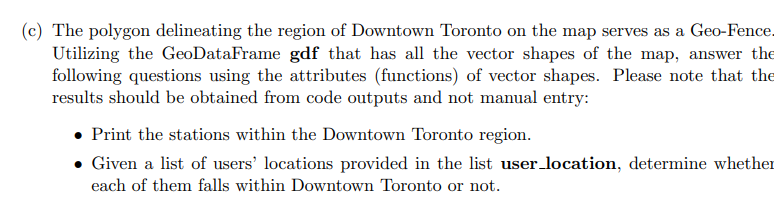

part 1

In [ ]:
### YOUR CODE HERE ###
def get_all_location_within_area(gdf, area) -> None:

    # get the geometry of the area
    if isinstance(area, Polygon):
        geom_area = area
    else:
        geom_area = gdf[gdf['name'] == area].geometry.values[0]

    # iterate through the GeoDataFrame to find all the locations within the area
    for _, row in gdf.iterrows():
        if geom_area.contains(row.geometry) and isinstance(row.geometry, Point):
            print(row['name'], ' is within ', area)

get_all_location_within_area(gdf, 'Downtown Toronto')

Spadina  is within  Downtown Toronto
Bloor  is within  Downtown Toronto
Union  is within  Downtown Toronto


part 2

In [ ]:
user_location = [Point(40,80), Point(40, 70), Point(55,80), Point(55,70),Point(47.5,65)]
### YOUR CODE HERE ###
def location_within_area(gdf, location, area) -> bool:
     #if given Point, use it, otherwise, get the geometry of the location
    geom_location = location if isinstance(location, Point) else gdf[gdf['name'] == location].geometry.values[0]
    geom_area = gdf[gdf['name'] == area].geometry.values[0]
    return geom_area.contains(geom_location)
for location in user_location:
    print(f'Is the location {location} within Downtown Toronto: ', location_within_area(gdf, location, 'Downtown Toronto'))

Is the location POINT (40 80) within Downtown Toronto:  False
Is the location POINT (40 70) within Downtown Toronto:  True
Is the location POINT (55 80) within Downtown Toronto:  False
Is the location POINT (55 70) within Downtown Toronto:  True
Is the location POINT (47.5 65) within Downtown Toronto:  True


## Q2: CRS and ShapeFiles

### Q2a

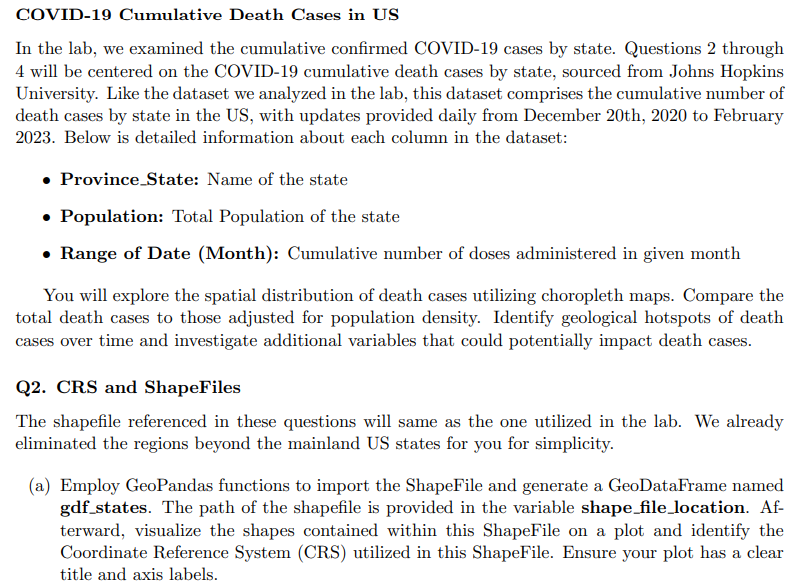

In [ ]:
### DO NOT CHANGE THE FOLLOWING CODE ###
#download the Shapefile
!wget https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
!os.mkdir('/content/cb_2018_us_state_500k')
!unzip cb_2018_us_state_500k.zip -d /content/cb_2018_us_state_500k

--2024-03-23 18:27:41--  https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip [following]
--2024-03-23 18:27:41--  https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3304931 (3.2M) [application/zip]
Saving to: ‘cb_2018_us_state_500k.zip’

cb_2018_us_state_50 100%[===================>]   3.15M  --.-KB/s    in 0.04s   

2024-03-23 18:27:41 (70.4 MB/s) - ‘cb_2018_us_state_500k

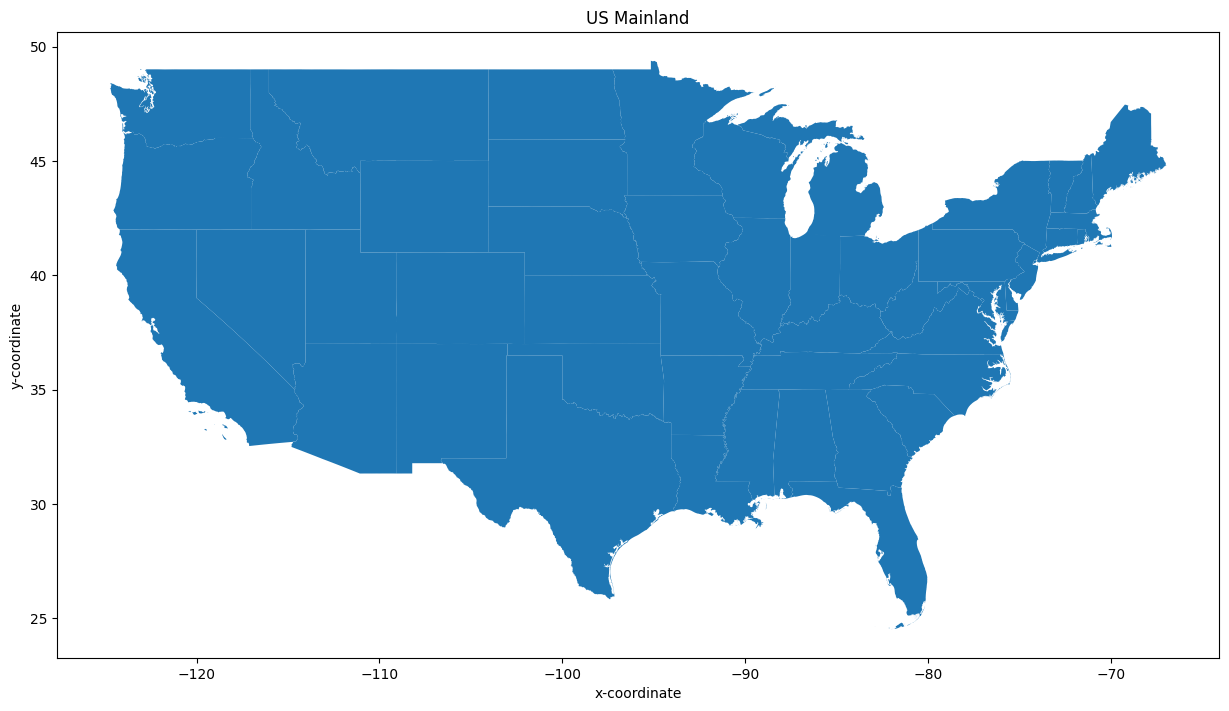

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [ ]:
shape_file_location = 'cb_2018_us_state_500k' # location of the shapefile
### YOUR CODE HERE ###
gdf_states = gpd.read_file(shape_file_location) # read the shapefile as a GeoDataFrame as gdf_states
### DO NOT CHANGE THE FOLLOWING CODE ###
gdf_states = gdf_states[['NAME', 'geometry']] # select the columns
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]


### YOUR CODE HERE ###
# plot the map
gdf_states.plot(figsize=(15, 15))
plt.title('US Mainland')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()
# check CRS
gdf_states.crs

**Your Text Answer:** The CRS used in the ShapeFiles is EPSG:4269

### Q2b

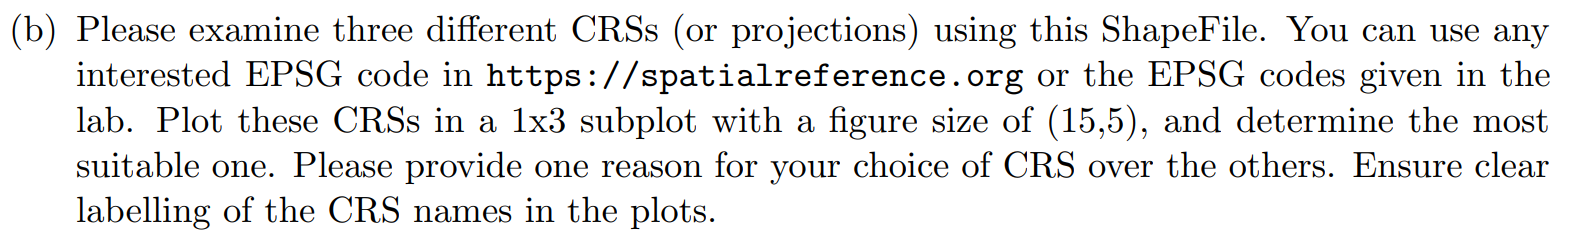

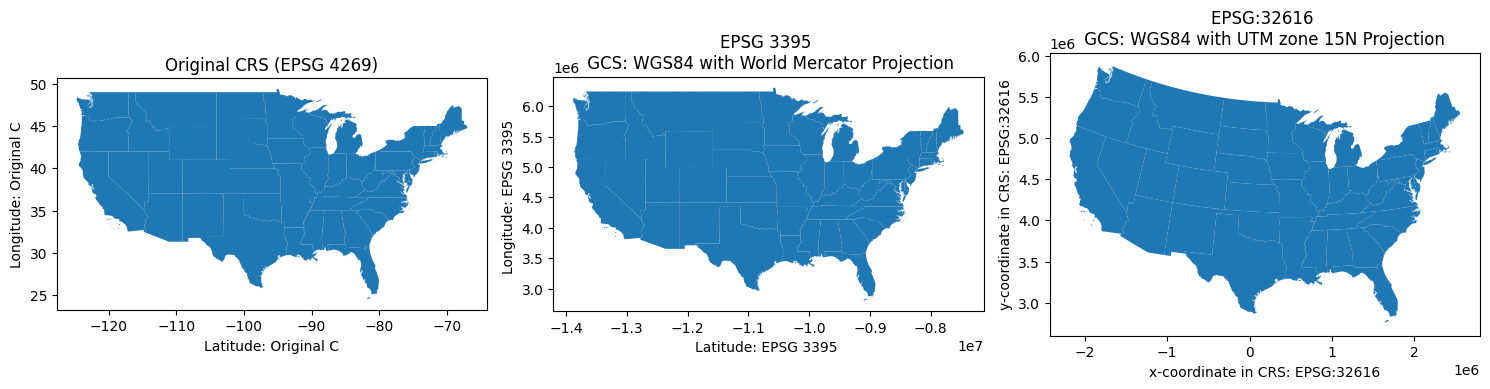

In [ ]:
### YOUR CODE HERE ###
# Define CRS options
crs_options = [
    ("Original CRS (EPSG 4269)", gdf_states),

    #EPSG code as a string
    ("EPSG 3395 \n GCS: WGS84 with World Mercator Projection", gdf_states.to_crs('EPSG:3395')),

    # Change CRS by name
    ("EPSG:32616 \n GCS: WGS84 with UTM zone 15N Projection ", gdf_states.to_crs("WGS 84 / UTM zone 15N"))
]

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax = ax.flatten()

# Plot each CRS
for i, (title, gdf) in enumerate(crs_options):
    gdf.plot(ax=ax[i],figsize=(5, 5))
    ax[i].set_title(title)
    if i < 2:
      ax[i].set_xlabel('Latitude: ' + title[0:10])
      ax[i].set_ylabel('Longitude: ' + title[0:10])
    else:
      ax[i].set_xlabel('x-coordinate in CRS: ' + title[0:10])
      ax[i].set_ylabel('y-coordinate in CRS: ' + title[0:10])

# Show plot
plt.tight_layout()
plt.show()

**Your Text Answer** I think the original is still the best. The visual difference is not too big between 4269 and 3395, however, since the original is a geographic CRS, it uses latitude and longitude coordinates, which are familiar to many and useful for a wide range of applications.

### Q2c

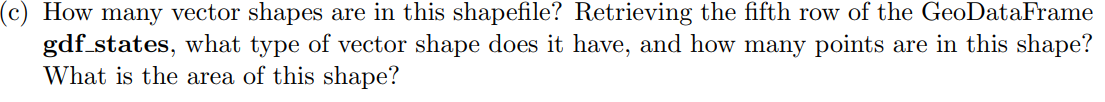

In [ ]:
### YOUR CODE HERE ###
total_shapes = len(gdf_states)
polygon = gdf_states.geometry[4]
print(f"Total vector shapes: {total_shapes}")
print('The Type of the Shape: ', polygon.geom_type)
print('Number of points in the polygon: ', len(polygon.exterior.xy[0]))
print('The bounds of the geometry: ', polygon.bounds)
print('Area: ', polygon.area)

Total vector shapes: 49
The Type of the Shape:  Polygon
Number of points in the polygon:  3880
The bounds of the geometry:  (-82.644739, 37.201482999999996, -77.71951899999999, 40.638801)
Area:  6.493879726220489


## Question 3: Choropleth By Popuplation

In [ ]:
### DO NOT MODIFY THE FOLLOWING CODE ###
# download the data and prepare the data
death_by_state = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
death_by_state = death_by_state.drop(columns = ['UID', 'iso2', 'iso3', 'code3',
                                                      'FIPS', 'Admin2', 'Country_Region',
                                                        'Lat', 'Long_', 'Combined_Key'])
gdf_states = gpd.read_file('cb_2018_us_state_500k')
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
death_by_state = death_by_state[death_by_state['Province_State'].isin(gdf_states['Province_State'])]
death_by_state = death_by_state.groupby('Province_State').sum().reset_index()
death_by_month = death_by_state.iloc[:, 2:].T
death_by_month.index = pd.to_datetime(death_by_month.index)
death_by_month = death_by_month.resample('M').last()
death_by_month = death_by_month.T.reset_index(drop=True)
death_by_month[['Province_State','Population']] = death_by_state[['Province_State', 'Population']]
#reorder the columns
death_by_month = death_by_month[['Province_State', 'Population'] + [x for x in death_by_month.columns[0:-2]]]
death_by_month.columns = ['Province_State', 'Population'] + [x.strftime('%m-%Y') for x in death_by_month.columns[2:]]
death_by_month.head()

,Province_State,Population,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,08-2020,...,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023
0,Alabama,4903185,0,0,23,272,630,950,1580,2182,...,19755,19891,20048,20422,20558,20652,20737,20870,20932,21032
1,Arizona,7278717,0,0,25,320,907,1645,3694,5029,...,30515,30768,31114,31370,31548,31751,32182,32775,33042,33102
2,Arkansas,3017804,0,0,8,61,133,270,453,797,...,11581,11719,11918,12165,12489,12564,12695,12852,12980,13020
3,California,39512223,0,0,170,2001,4113,5990,9124,12861,...,92163,93409,94794,95863,96793,97435,98544,99988,100726,101159
4,Colorado,5758736,0,0,69,1251,1612,1724,1867,1965,...,12918,13078,13166,13316,13421,13609,13882,14034,14106,14181


### Q3a

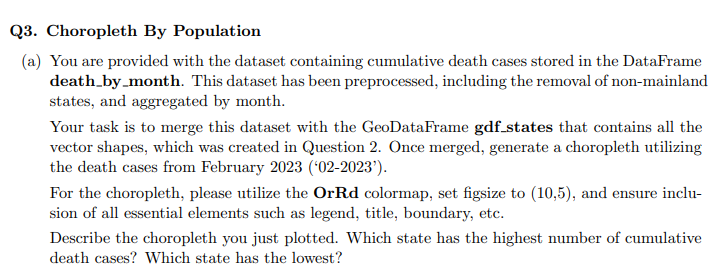

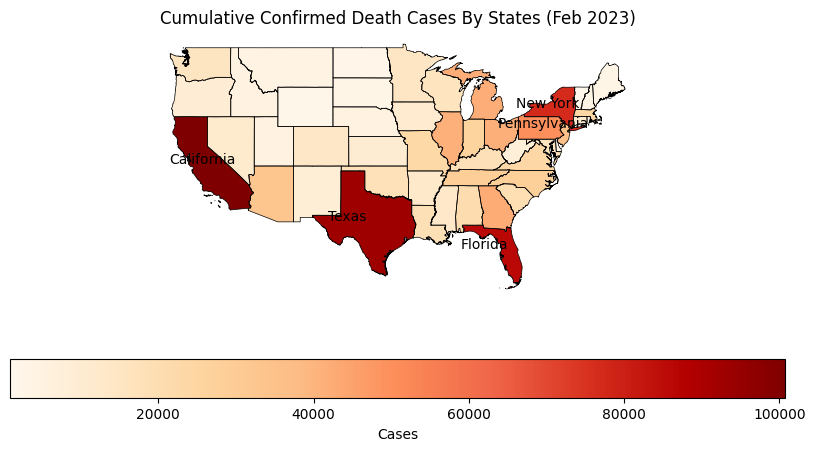

In [ ]:
gdf_states.to_crs(epsg=4269, inplace=True)

### YOUR CODE HERE ###
# DataFrame 'death_by_month' contains the dataset for this problem
gdf_death = gpd.GeoDataFrame(gdf_states[['Province_State', 'geometry']].merge(death_by_month)) #Merging DataFrame 'death_by_month' with GeoDataFrame 'gdf_states'. The merged GeoDataFrame should be stored in 'gdf_death'

gdf_death.plot(figsize=(10, 5), column='02-2023',
                         legend=True,cmap='OrRd',
                         legend_kwds={"label": "Cases", "orientation": "horizontal"}) # change the legend style

# plot the boundary of the states
gdf_death.boundary.plot(figsize=(10, 5),ax = plt.gca(), color='k', linewidth=0.5)

# label the top 5 states with the highest confirmed cases
max_cases_state = gdf_death.nlargest(5, '02-2023')
for x, y, label in zip(max_cases_state.geometry.centroid.x,
                       max_cases_state.geometry.centroid.y,
                       max_cases_state['Province_State']):
    plt.gca().annotate(label, xy=(x, y), xytext=(-30, 0), textcoords="offset points")
plt.title('Cumulative Confirmed Death Cases By States (Feb 2023)')
plt.axis('off') # Or we can remove the axis
plt.show()



**Your Text Answer** California had the highest numebr of cases, and Vermont had the least.

---



### Q3b

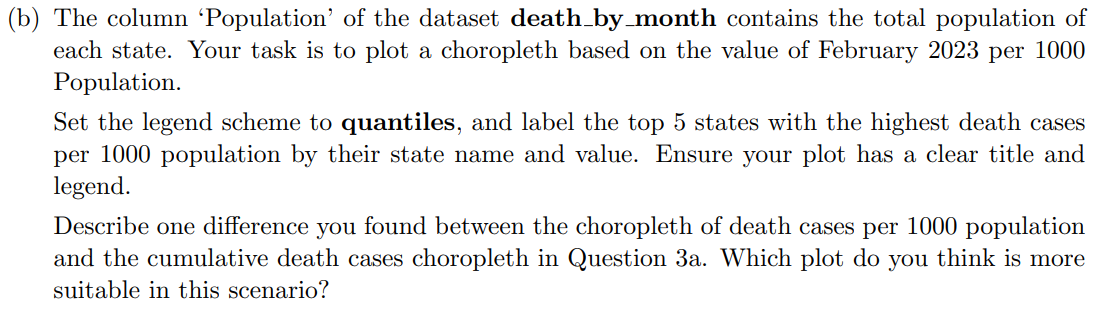

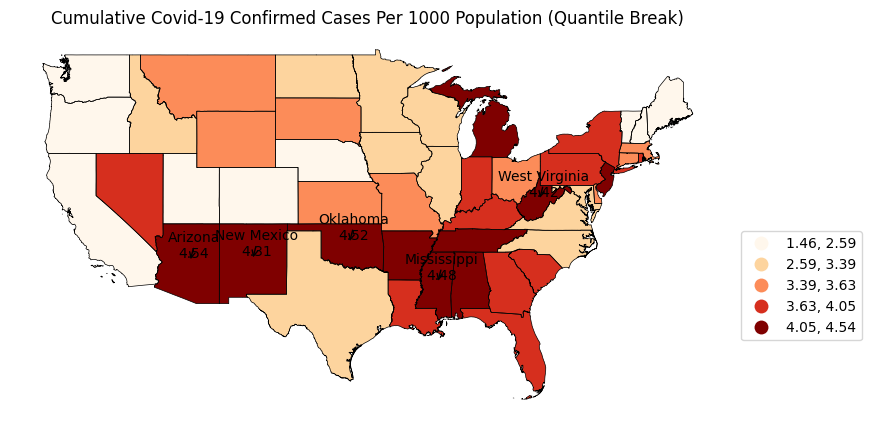

In [ ]:
### YOUR CODE HERE ###
# get current month's data
current_month = gdf_death[['Province_State','02-2023','geometry','Population']]
# calculate the confirmed cases per 1000 people in the state
current_month['Density'] = current_month['02-2023'] / current_month['Population'] * 1000

# Visualize the density with the quantile scheme
fig, ax = plt.subplots(figsize=(10, 5))  # Adjusted to use only one plot

# Plotting with quantile scheme
current_month.plot(column='Density', scheme='quantiles', cmap='OrRd', legend=True, ax=ax,
                   legend_kwds={"bbox_to_anchor": (1.2, 0.5)})
gdf_death.boundary.plot(ax=ax, color='k', linewidth=0.5)  # Plot the boundary of the states
ax.set_title('Cumulative Covid-19 Confirmed Cases Per 1000 Population (Quantile Break)')
ax.axis('off')  # Remove the axis

# Label the top 5 states with the highest confirmed cases by its name and value
max_cases_state = current_month.nlargest(5, 'Density')  # Adjusted to get the top 2 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                             max_cases_state.geometry.centroid.y,
                             max_cases_state['Province_State'],
                             max_cases_state['Density']):
    ax.annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(3, 3),
                textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.show()

**Your Text Answer** While California had a large number of confirmed cases, its cases per 1000 population is relatively low.This suggests that the total number of confirmed cases may be influenced by factors like large population size. Cases per 1000 population provides a more standardized measure for comparison across different regions.For instance, when we talk about "cases per 1000 population," we're essentially asking, "If we look at a standard group of 1000 people from this area, how many cases would we expect to find?" This standardization allows us to compare different areas directly because we're no longer influenced by the sheer size of the populations but rather by how densely the cases are spread within those populations.


## Question 4: Choropleth By Time

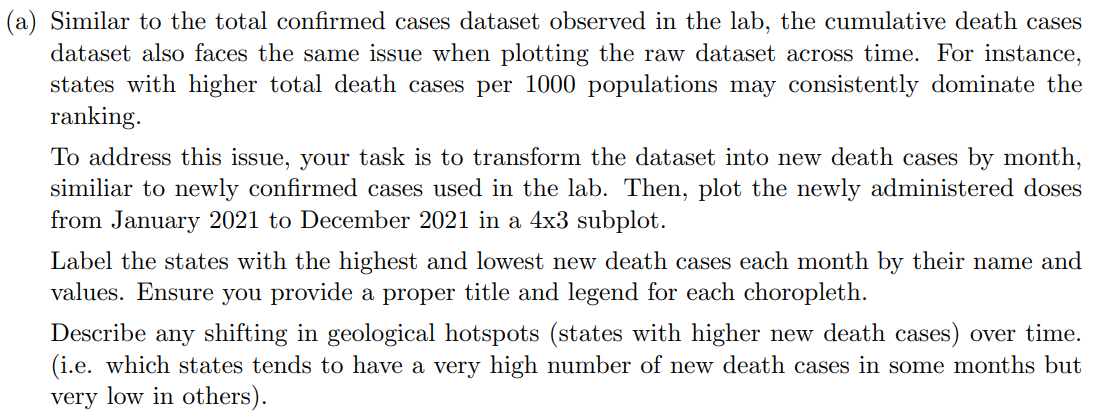

In [ ]:
### YOUR CODE HERE ###
def choropleth_by_month(gdf, year, ax, title) -> None:
    # get year data
    current_year = [col for col in gdf.columns if year in col]
    # plot the data
    for i, month in enumerate(current_year):
        # select the month and calculate the density
        gdf_density = gdf[['Province_State', month, 'geometry',
                           'Population']]
        # calculate the density
        gdf_density['Density'] = gdf_density[month] / (gdf_density['Population']) * 1000
        # plot the data
        gdf_density.plot(ax=ax[i], column='Density',
                         cmap='OrRd',legend=True,legend_kwds={"label": "Cases"})

        # plot the boundary of the states
        gdf.boundary.plot(ax = ax[i], color='k', linewidth=0.5)

        # label states with the highest and lowest cases per 1000 population
        max_cases_state = gdf_density.nlargest(1, 'Density')
        min_cases_state = gdf_density.nsmallest(1, 'Density')

        for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                                     max_cases_state.geometry.centroid.y,
                                     max_cases_state['Province_State'],
                                     max_cases_state['Density']):
            ax[i].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                           textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

        for x, y, name, value in zip(min_cases_state.geometry.centroid.x,
                                        min_cases_state.geometry.centroid.y,
                                        min_cases_state['Province_State'],
                                        min_cases_state['Density']):
                ax[i].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                            textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

        ax[i].set_title(title + f' ({month})')
        ax[i].set_axis_off()
    plt.show()

def get_difference_between_timestamp(gdf) -> gpd.GeoDataFrame:
    # select columns that are not 'Province_State', 'geometry', and 'Population'
    col = [col for col in gdf.columns if col not in ['Province_State', 'geometry', 'Population']]
    gdf_newly_confirmed = gdf[col].diff(axis=1)
    # remove negative values (we only need the newly confirmed cases)
    gdf_newly_confirmed = gdf_newly_confirmed.clip(lower=0)
     # adding the first month's data
    gdf_newly_confirmed.iloc[:,0] = gdf[col[0]]
    # add the 'Province_State', 'geometry', and 'Population' columns
    gdf_newly_confirmed = gdf[['Province_State', 'geometry', 'Population']].join(gdf_newly_confirmed)
    # Every time we use a pandas function, we need to ensure that the result is
    # converted back to a GeoDataFrame if we intend to work with geographic data.
    gdf_newly_confirmed = gpd.GeoDataFrame(gdf_newly_confirmed)

    return gdf_newly_confirmed

gdf_newly_confirmed = get_difference_between_timestamp(gdf_death)

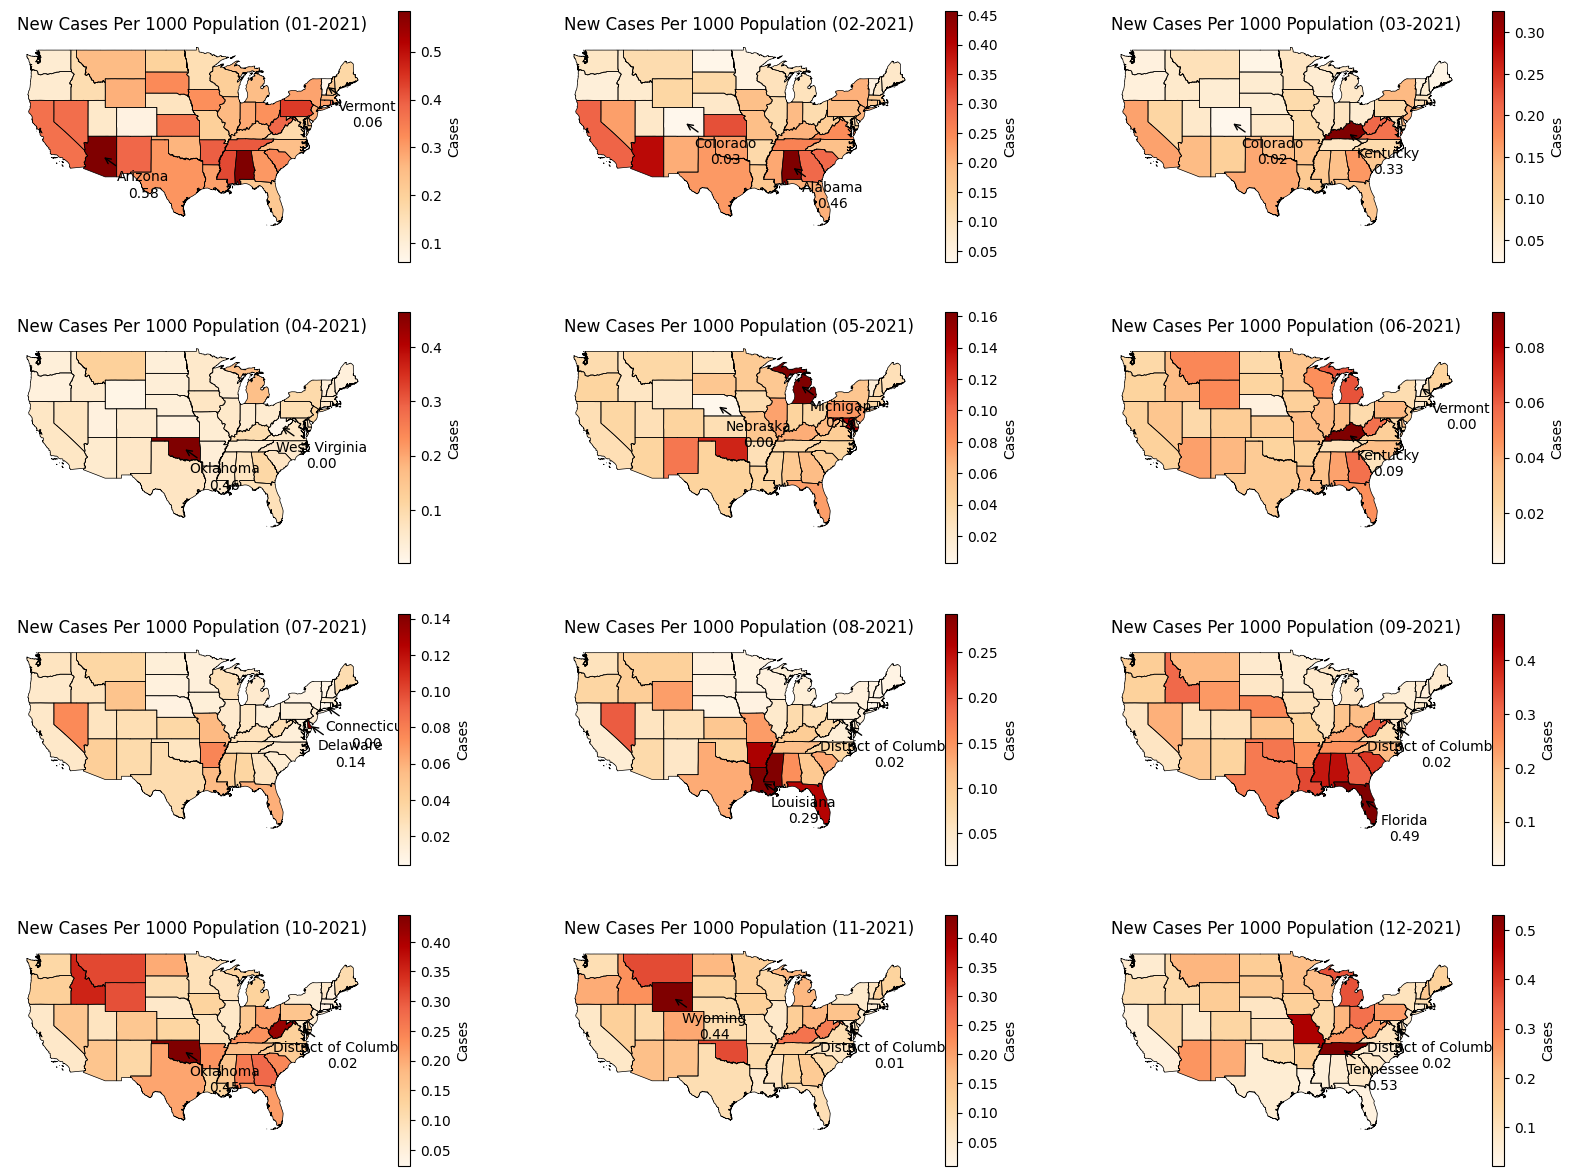

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
ax = ax.flatten()
## YOUR CODE HERE ##
# plot the new death cases per 100 population from 01-2021 to 12-2021
choropleth_by_month(gdf_newly_confirmed, '-2021',ax,
                    title='New Cases Per 1000 Population')

**Your Text Answer** Arizona had the highest confirmed cases in January 2021, but saw significantly lower confirmed cases in April 2021. This is evidence of the dynamic nature of hotspots, which shift throughout the year.

### Q4b

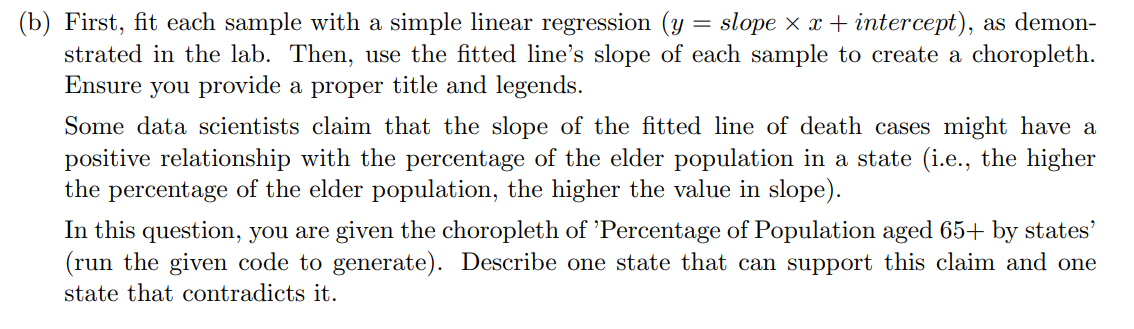

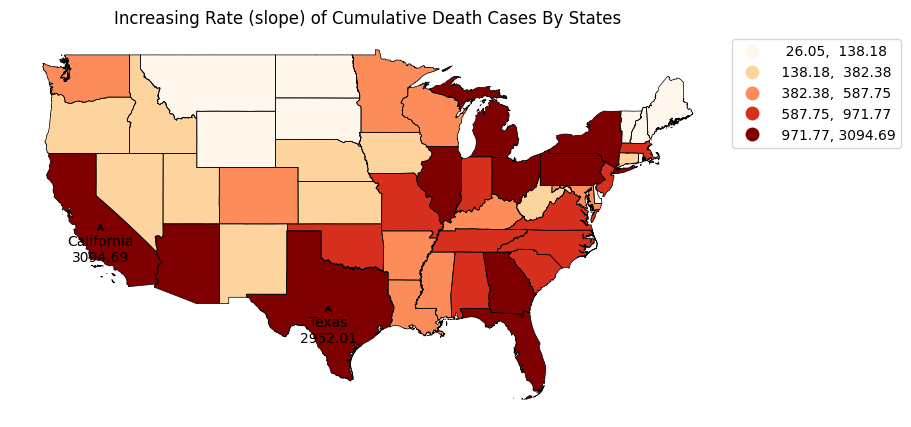

In [ ]:
### YOUR CODE HERE ###
def linear_regression(sample):
    x = range(len(sample))
    y = sample
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)

    # Calculate the slope (m) and intercept (b) of the regression line
    numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denominator = sum((xi - mean_x) ** 2 for xi in x)
    slope = numerator / denominator
    intercept = mean_y - slope * mean_x

    return slope, intercept

gdf_increase_rate = gdf_death.copy()
# calculate the slope for each state
col = [col for col in gdf_increase_rate.columns if col not in ['Province_State', 'geometry', 'Population']]
gdf_increase_rate['slope'] = gdf_increase_rate.apply(lambda x: linear_regression(x[col])[0], axis=1)
# choropleth based on the slope
gdf_increase_rate.plot(figsize=(10, 5), column='slope', cmap='OrRd',
                       legend=True,scheme='quantiles',
                         legend_kwds={"bbox_to_anchor": (1, 1),
                                      'loc': 'upper left'})
gdf_increase_rate.boundary.plot(color='k', linewidth=0.5,ax = plt.gca())

# label the top 2 states with the highest increase rate
max_cases_state = gdf_increase_rate.nlargest(2, 'slope') # get the top 2 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['slope']):
    plt.gca().annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(0, -30),
                     textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.title('Increasing Rate (slope) of Cumulative Death Cases By States')
plt.axis('off')
plt.show()

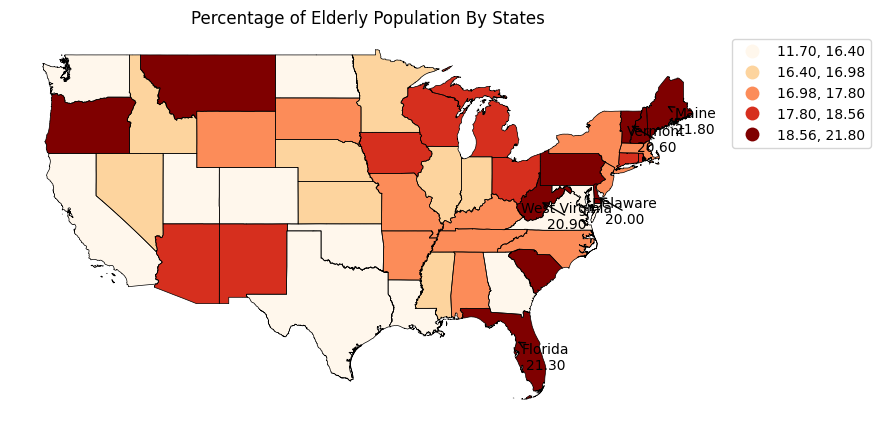

In [ ]:
### DO NOT MODIFY ###
# run the code the plot the precentage of population aged 65+ by states choropleth
elder_population = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/elder_population.csv')[['State','Population Ages 65+ (percent of state population)']]
elder_population.columns = ['Province_State', 'Elderly']
# read the shapefile
gdf_states = gpd.read_file('cb_2018_us_state_500k')
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
gdf_elder = gdf_states.merge(elder_population)
gdf_elder.plot(column='Elderly', cmap='OrRd', legend=True, figsize=(10, 5), scheme='quantiles',
               legend_kwds={"bbox_to_anchor": (1, 1),'loc': 'upper left'})
gdf_elder.boundary.plot(figsize=(10, 5),ax = plt.gca(), color='k', linewidth=0.5)
# label the top 5 states with precentage of elderly population
max_cases_state = gdf_elder.nlargest(5, 'Elderly') # get the top 5 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['Elderly']):
    plt.annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(20, -20),
                   textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.title('Percentage of Elderly Population By States')
plt.axis('off')
plt.show()


**Your Text Answer** The claim doesn't support the fact that California had one of the fastest growing death rates but the percentage of Elderly population is very low. On the other hand, Maine and Vermon have very high percentage of Elderly population but has very slow rate of death.